<a href="https://colab.research.google.com/github/enriqueasegura/Quantum-X/blob/master/QC_Mentorship_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
!pip install git+https://github.com/quantumlib/Cirq
  
import matplotlib.pyplot as plt
from pandas import DataFrame
import cirq
from cirq.ops import CNOT, TOFFOLI
from cirq import Simulator
import random
from sympy import Symbol
from cirq.circuits import InsertStrategy

! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

import matplotlib

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['TeX Gyre Schola']})
rc('text', usetex=True)

  Cloning https://github.com/quantumlib/Cirq to /tmp/pip-req-build-wj4soitg
  Running command git clone -q https://github.com/quantumlib/Cirq /tmp/pip-req-build-wj4soitg
     |████████████████████████████████| 1.2MB 4.9MB/s 
  Created wheel for cirq: filename=cirq-0.8.0.dev0-cp36-none-any.whl size=1281844 sha256=0094ec840540cd83a99b7c51810a98bc73ccbb9dd378bc22ee5f487a1ab89b63
  Stored in directory: /tmp/pip-ephem-wheel-cache-d64xx60k/wheels/c9/f4/ee/029123a49c5e2d75d08c2a9f937e207b88f045901db04632a7
Successfully built cirq
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

##Task 2

Implement a circuit which returns |00> and |11> with equal probability.

Requirements :
1. Circuit should consist only of CNOTs, RXs and RYs. 
2. Start from all parameters in parametric gates being equal to 0. 
3. You should find the right set of parameters using gradient descent (you might use more advanced optimization methods if you like). 
4. Simulations must be done with sampling - i.e. limited number of measurements per iteration and noise. 

Compare the results for different numbers of measurements: 1, 10, 100, 1000. 

Bonus question:
How to make sure you produce state |00>+|11> and not |00>-|11> ?


#Building a Bell State to illustrate the circuit we want to do 

1. We would like to build a circuit relying on the old fashion quantum circuit. 
2. We wil follow Chuang and Nielsen's book to develop this system. 

In [104]:
#let's build a simple Cirq circuit to make this bell state 

circuit = cirq.Circuit()

#defining number of physical qubits in the circuit
num_physical_qubits = 2

qubits = [ cirq.LineQubit(i) for i in range(num_physical_qubits)]

#building the bell state
circuit.append(cirq.H(qubits[0]))

circuit.append(cirq.CNOT(qubits[0], qubits[1]))

#This part is key: to measure not at the same time but in this sequence to get the new basis

circuit.append(cirq.measure(qubits[1]), strategy=InsertStrategy.EARLIEST)
circuit.append(cirq.measure(qubits[0]), strategy=InsertStrategy.NEW)

print('Resulting Circuit that brings one of the ')
print(circuit)
print(qubits)


Resulting Circuit that brings one of the 
0: ───H───@───────M───
          │
1: ───────X───M───────
[cirq.LineQubit(0), cirq.LineQubit(1)]


This is the result we can to reach through optimization:


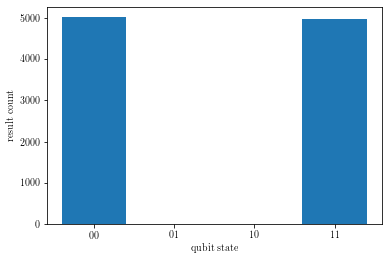

In [105]:
#call the simulator to conduct the measurement

simulator = cirq.Simulator()

#execute simulations

num_repetitions = 10000

results = simulator.run(circuit, repetitions=num_repetitions)
print('This is the result we can to reach through optimization:')
cirq.plot_state_histogram(results)

#Preserve the measurement values
s_k, s_v= zip(*results.measurements.items())

label_values = 1 - 2*np.array(s_v).astype(np.int32)

#Developing the other Bell State


Resulting Circuit that brings one of the 
0: ───H───@───Z───M───
          │
1: ───────X───M───────


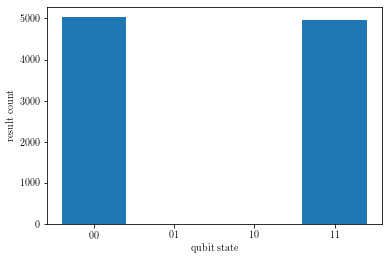

array([5033.,    0.,    0., 4967.])

In [641]:
c = cirq.Circuit()

#building the bell state
c.append(cirq.H(qubits[0]))

c.append(cirq.CNOT(qubits[0], qubits[1]))
c.append(cirq.Z(qubits[0]))
#This part is key: to measure not at the same time but in this sequence to get the new basis

c.append(cirq.measure(qubits[1]), strategy=InsertStrategy.EARLIEST)
c.append(cirq.measure(qubits[0]), strategy=InsertStrategy.NEW)
#c.append(cirq.measure(qubits[0]))
print('Resulting Circuit that brings one of the ')
print(c)

c_simul = cirq.Simulator()
c_r = c_simul.run(c, repetitions=num_repetitions)

cirq.plot_state_histogram(c_r)

#Wrapping this example into a function 

In [0]:
#Our approach is borrowed from Farhi et al's paper
#Namely, to establish a way to extract the quantum state label and
#use sgd to get it
#so first, build the boiler-plate bell state 

def hadamard_bell_state(num_qubits, measure_toggle):
  c = cirq.Circuit()
  q = [cirq.LineQubit(i) for i in range(num_physical_qubits)]

  #building the bell state
  c.append(cirq.H(q[0]))
  c.append(cirq.CNOT(q[0], q[1]))
  #if you want the circuit done normally:
  
  if measure_toggle == 'yes':
    print(measure_toggle)
    c.append(cirq.measure(q[1], key='readout'), strategy=InsertStrategy.EARLIEST)
    c.append(cirq.measure(q[0]), strategy=InsertStrategy.NEW)
  #This part is key: to measure not at the same time but in this sequence to get the new basis
  elif measure_toggle == 'no':
    #c.append(cirq.Y(q[0]))
    c.append(cirq.measure(q[0], key='readout'))
  print('Resulting Circuit that brings one of the ')
  print(c)
  print(q)
  return(c)

In [390]:
test_hadamard_bs = hadamard_bell_state(num_physical_qubits, 'no')

Resulting Circuit that brings one of the 
0: ───H───@───M('readout')───
          │
1: ───────X──────────────────
[cirq.LineQubit(0), cirq.LineQubit(1)]


#Bringing in Notions of Loss and Quantum State Labeling

This is the result when dealing with ideal case:


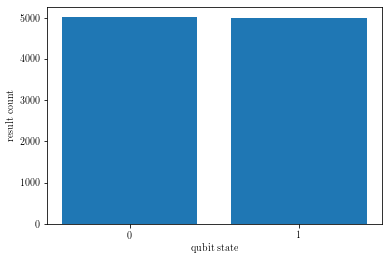

In [391]:
#Now, let's calculate the values regarding current label at the ideal case and the loss function at that case

#call the simulator to conduct the measurement

t_simulator = cirq.Simulator()

#execute simulations

num_repetitions = 10000

t_results = simulator.run(test_hadamard_bs, repetitions=num_repetitions)
print('This is the result when dealing with ideal case:')
cirq.plot_state_histogram(t_results)

#Preserve the measurement values
s_k, s_v= zip(*t_results.measurements.items())
label_values = 1 - 2*np.array(s_v).astype(np.int32)

In [392]:
current_predicted_label_value = np.mean(label_values)
print('current pred label: ', current_predicted_label_value )
  
current_loss_value = 1 - np.square(current_predicted_label_value)
print('current loss: ', current_loss_value)

current pred label:  0.0026
current loss:  0.99999324


# Now, let's decompose the Hadamard gate into X and Y gates.

In [0]:
def H_X_Y_Gate(input_circuit, input_qubit, x_param, y_param):
  #take the input circuit, the selected quibit, and add the decomposed Hadamard gate in terms of X Y gates
  #add first_gate: X gate
  param_X_gate = cirq.XPowGate(exponent=x_param)
  yield param_X_gate(input_qubit)
  param_Y_gate = cirq.YPowGate(exponent=y_param)
  yield param_Y_gate(input_qubit)

In [394]:
decomp_circuit = cirq.Circuit()

yp = np.random.uniform(0,2*np.pi)
xp = np.random.uniform(0,2*np.pi)

decomp_circuit.append(H_X_Y_Gate(decomp_circuit, qubits[0], xp, yp))

#add the control 

decomp_circuit.append(cirq.CX(qubits[0], qubits[1]))

#This part is key: to measure not at the same time but in this sequence to get the new basis

decomp_circuit.append(cirq.measure(qubits[1]), strategy=InsertStrategy.EARLIEST)
decomp_circuit.append(cirq.measure(qubits[0]), strategy=InsertStrategy.NEW)

print('Resulting Circuit that brings one of the:')
print(decomp_circuit)
print(qubits)

Resulting Circuit that brings one of the:
0: ───X^-0.007───Y^-0.648───@───────M───
                            │
1: ─────────────────────────X───M───────
[cirq.LineQubit(0), cirq.LineQubit(1)]


This is the result when dealing with a random parameter on the Y-Gate of the decomposition


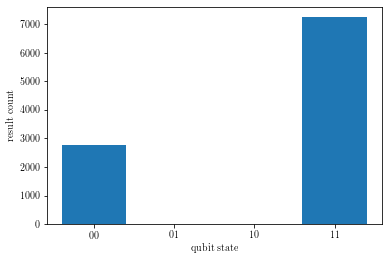

In [395]:
#call the simulator to conduct the measurement

d_simulator = cirq.Simulator()

#execute simulations

num_repetitions = 10000
print('This is the result when dealing with a random parameter on the Y-Gate of the decomposition')
d_results = simulator.run(decomp_circuit, repetitions=num_repetitions)

cirq.plot_state_histogram(d_results)

#Preserve the measurement values
s_k, s_v= zip(*d_results.measurements.items())
ancilla_label_values = 1 - 2*np.array(s_v).astype(np.int32)

In [396]:
#examine the values in this measurement

current_predicted_label_value = np.mean(ancilla_label_values)
print('current pred label: ', current_predicted_label_value )
  
current_loss_value = 1 - np.square(current_predicted_label_value)
print('current loss: ', current_loss_value)

current pred label:  -0.449
current loss:  0.798399


#So what to do? 

Answer: let's add a readout bit to measure the label of the ancilla bit. 

In [0]:
#let's build a function that builds the bell state circuit 

def param_bell_circuit(num_ph_qubits, rnd_x_param, rnd_y_param, rnd_cx_param, measurement_toggle):

  curr_circuit = cirq.Circuit()
  curr_qubits = [cirq.LineQubit(i) for i in range(num_ph_qubits)]
  
  #building the bell state
  #curr_circuit.append(H_X_Y_Gate(curr_circuit, curr_qubits[0], rnd_x_param, rnd_y_param))
  
  param_X_gate = cirq.XPowGate(exponent=rnd_x_param)
  curr_circuit.append(param_X_gate(curr_qubits[0]))
  param_Y_gate = cirq.YPowGate(exponent=rnd_y_param)
  curr_circuit.append(param_Y_gate(curr_qubits[0]))
  
  #add the control to param based control-x gate
  param_CX_gate = cirq.CNotPowGate(exponent=rnd_cx_param)
  curr_circuit.append(param_CX_gate(curr_qubits[0], curr_qubits[1]))

  """
  elif measurement_toggle =='no':
    #curr_circuit.append(cirq.measure(curr_qubits[0], key='readout'))
    #curr_circuit.append(cirq.measure(curr_qubits[1]))
    #curr_circuit.append(cirq.measure(curr_qubits[1], key='readout'))
    #curr_circuit.append(cirq.CX(curr_qubits[0], curr_qubits[-1]))
    #curr_circuit.append(cirq.X(curr_qubits[-1]))
    #curr_circuit.append(cirq.measure(curr_qubits[-1], key='readout'))
  return curr_circuit
  """
  #if you just want the standard bell circuit without the ancilla readout bit,
  if measurement_toggle == 'yes':
    curr_circuit.append(cirq.measure(curr_qubits[1]), strategy=InsertStrategy.EARLIEST)
    curr_circuit.append(cirq.measure(curr_qubits[0], key='readout'), strategy=InsertStrategy.NEW)

  #add control gates to the readout bit
  elif measurement_toggle == 'no': #add control gates to the readout bit
    #curr_circuit.append(cirq.Y(curr_qubits[0]))
    #curr_circuit.append(cirq.Y(curr_qubits[1]))
    curr_circuit.append(cirq.measure(curr_qubits[1], key='readout'))
  return(curr_circuit)

In [628]:
yp = np.random.uniform(0,np.pi)
xp = np.random.uniform(0,np.pi)
cxp = np.random.uniform(0,np.pi)
test_param_bc = param_bell_circuit(num_physical_qubits, xp, yp, cxp, 'yes')
print('random parameter: ', xp, yp)
print('resulting circuit:')
print(test_param_bc)

random parameter:  1.492168755953292 2.4593839075167345
resulting circuit:
0: ───X^-0.508───Y^0.459───@─────────────M('readout')───
                           │
1: ────────────────────────X^0.915───M──────────────────


# Now let's observe the current distribution of states

In [0]:
def circuit_simulator(input_c, num_reps, measurement_toggle):
  curr_simulator = cirq.Simulator()
  curr_results = simulator.run(input_c, repetitions=num_reps)
  print('This is the result when dealing with a random parameter on the X and Y-Gate of the decomposition: ')
  cirq.plot_state_histogram(curr_results)

  #Preserve the measurement values
  s_k, s_v= zip(*results.measurements.items())
  label_values = 1 - 2*np.array(s_v).astype(np.int32)
  curr_h = 0
  #count_results = test_results.histogram(key='readout')
  #if you are reading one of the bits
  if measurement_toggle == 'no':
    curr_h = curr_results.histogram(key='readout')
  return(curr_results, s_k, s_v, label_values, curr_h)  

This is the result when dealing with a random parameter on the X and Y-Gate of the decomposition: 


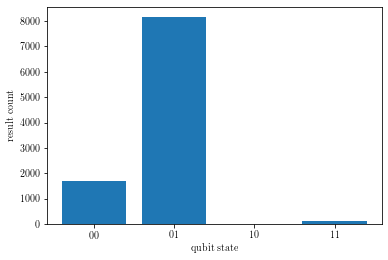

In [534]:
test_simulator_bc = circuit_simulator(test_param_bc, num_repetitions, 'yes')

Now let's add the measurements so we can get a readout bit to examine:

In [536]:
test_param_bc_readout_bit = param_bell_circuit(num_physical_qubits, xp, yp,cxp, 'yes')
print('random parameter: ', xp, yp)
print('resulting circuit:')
print(test_param_bc_readout_bit)

random parameter:  2.927281310094078 1.7291027991419101
resulting circuit:
0: ───X^0.927───Y^-0.271───@──────────────M('readout')───
                           │
1: ────────────────────────X^-0.082───M──────────────────


This is the result when dealing with a random parameter on the X and Y-Gate of the decomposition: 


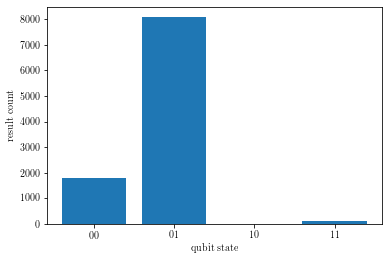

In [537]:
test_simulator_bc_readout_bit = circuit_simulator(test_param_bc_readout_bit, num_repetitions, 'no')

In [538]:
test_simulator_bc_readout_bit[-1][0]/num_repetitions

0.178

In [0]:
#let's applied SGD to find the right gate parameter 

def SGD_BC(xparam, yparam, cxparam, num_reps):
  yparam_arr = []
  xparam_arr = []
  cxparam_arr= []
  loss_arr = []

  zero_state_arr =[]
  one_state_arr=[]

  label_arr =[]
  diff_arr =[]

  status='not done'
  #seed value of the original yparam in the circuit 

  #code to implement Learning Rate Optimization
  #We used OpenAI's Adam paper as a reference.
  
  biased_first_moment = 0
  biased_second_moment = 0

  beta_1 = 0.9
  beta_2 = 0.999
  smoothing_epsilon = 1e-8
  learning_rate = 0.01

  count = 0

  while status == 'not done':
    count += 1
    #get results
    
    yparam_arr.append(yparam)
    xparam_arr.append(xparam)
    cxparam_arr.append(cxparam)

    #print('current count: ', count)
    #print('current yparam:', yparam)
    
    test_circuit = param_bell_circuit(num_physical_qubits, xparam, yparam, cxparam, 'yes')
    
    test_results = simulator.run(test_circuit, repetitions=num_reps)
    
    count_results = test_results.histogram(key='readout')
    
    #normalizing state population by repetition value
    zero_state_arr.append(count_results[0]/num_reps)
    one_state_arr.append(count_results[1]/num_reps)
    
    s_k, s_v= zip(*test_results.measurements.items())
  
    current_state_values = 1-2*np.array(s_v).astype(np.int32)

    current_predicted_label_value = np.mean(current_state_values)
    #print('current pred label: ', current_predicted_label_value )
    label_arr.append(current_predicted_label_value)
  
    current_loss_value = 1 - np.square(current_predicted_label_value)
    loss_arr.append(current_loss_value)
    
    current_gradient_value = 2*current_predicted_label_value
    
    current_grad_square = np.square(current_gradient_value)
    
    target_loss_value =  .9999
    target_difference = target_loss_value - current_loss_value
    diff_arr.append(target_difference)
    print('current count: ', count, 'current loss: ', current_loss_value, 'current diff:', target_difference)

    
    if count > 2000: 
      print('count is way too much!')
      status = 'done'
      break
    
    elif np.absolute(target_difference) < 1e-5:
    #elif np.absolute(target_difference) < 1e-3:
      status = 'done'
      print('Done! Final Weight: ',yparam_arr[-1])
      print('Done! Final Weight: ',xparam_arr[-1])
      print('Done! Final Weight: ',cxparam_arr[-1])
      cirq.plot_state_histogram(test_results)   

    else:
      
      #This code updates the moment vector's parameters. 
      #biased corrected first estimate 
      biased_first_moment = beta_1*biased_first_moment +(1-beta_1)*current_gradient_value
      
      #biased second momentum
      #biased_second_moment = next_gradient_moment / (1- np.power(beta_1,count))
      
      #swap the value for the next iteration
      #radient_moment = next_gradient_moment 
      
      #next_momentum_moment = beta_2*momentum_moment + (1-beta_2)*np.square(current_gradient_value)
      
      #biased corrected first estimate for momentum 
      biased_second_moment = beta_2*biased_second_moment + (1 - beta_2)*current_grad_square

      #make updates 
      biased_first_moment = np.divide(biased_first_moment, 1 - np.power(beta_1, count))
      biased_second_moment = np.divide(biased_second_moment, 1 - np.power(beta_2, count))
      
      #another swap
      #momentum_moment = next_momentum_moment
      
      #adjust the weights to find optimal parameters 
      yparam = yparam - learning_rate * target_difference/current_grad_square
      xparam = xparam - learning_rate * target_difference/current_grad_square
      cxparam = cxparam - learning_rate * target_difference/current_grad_square
      
      #yparam = yparam - np.multiply(np.multiply(learning_rate,biased_first_moment), (np.sqrt(biased_second_moment) + smoothing_epsilon))
      #xparam = xparam - np.multiply(np.multiply(learning_rate,biased_first_moment), (np.sqrt(biased_second_moment) + smoothing_epsilon))
      #cxparam = cxparam -  np.multiply(np.multiply(learning_rate,biased_first_moment), (np.sqrt(biased_second_moment) + smoothing_epsilon))

  return(xparam_arr, yparam_arr, cxparam_arr,loss_arr, diff_arr, xparam_arr[-1],yparam_arr[-1], cxparam_arr[-1], label_arr, zero_state_arr, one_state_arr)


current random y parameter:  0.4391164637598094 1.6312192000984838 2.881327629467838
current count:  1 current loss:  0.99265551 current diff: 0.007244490000000048
current count:  2 current loss:  0.98926704 current diff: 0.010632960000000025
current count:  3 current loss:  0.99209679 current diff: 0.00780321000000006
current count:  4 current loss:  0.99127644 current diff: 0.008623559999999975
current count:  5 current loss:  0.98602876 current diff: 0.013871240000000062
current count:  6 current loss:  0.98818431 current diff: 0.011715690000000056
current count:  7 current loss:  0.98514039 current diff: 0.014759610000000034
current count:  8 current loss:  0.99197184 current diff: 0.007928159999999962
current count:  9 current loss:  0.986775 current diff: 0.013125000000000053
current count:  10 current loss:  0.99106975 current diff: 0.00883025000000004
current count:  11 current loss:  0.98778975 current diff: 0.012110249999999989
current count:  12 current loss:  0.98772336 cur

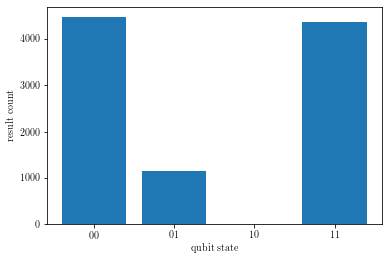

In [622]:
xp, yp, cxp = np.random.uniform(0,1*np.pi),np.random.uniform(0,1*np.pi), np.random.uniform(0,1*np.pi)
print('current random y parameter: ', xp, yp, cxp)
print('======')
test_sgd = SGD_BC(xp, yp,cxp, num_repetitions)

In [623]:
test_optimization = param_bell_circuit(num_physical_qubits, test_sgd[5],test_sgd[6], test_sgd[7], 'yes')
print('random parameter: ', test_sgd[5], test_sgd[6], test_sgd[7])
print('resulting circuit:')
print(test_optimization)

random parameter:  0.2611387352555427 1.453241471594217 2.703349900963573
resulting circuit:
0: ───X^0.261───Y^-0.547───@─────────────M('readout')───
                           │
1: ────────────────────────X^0.703───M──────────────────


This is the result when dealing with a random parameter on the X and Y-Gate of the decomposition: 


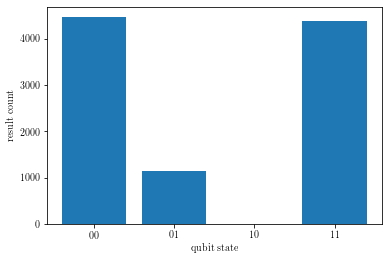

In [624]:
test_simulator_op = circuit_simulator(test_optimization, num_repetitions, 'yes')

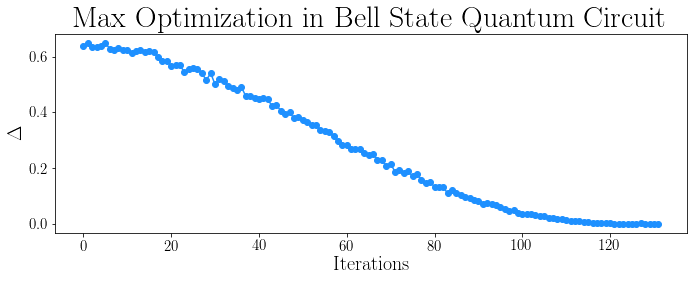

In [621]:
plt.figure(figsize=(10,5))

plt.plot(test_sgd[4], color='dodgerblue', marker='o')

plt.tick_params(axis='both', labelsize=15)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel(r'$\Delta$', fontsize=20)
plt.title('Max Optimization in Bell State Quantum Circuit', fontsize=30)

plt.tight_layout()

plt.subplots_adjust(top=0.7)